In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import pandas as pd #导入pandas库
import seaborn as sns #导入可视化包seaborn
import numpy as np #导入numpy库
from keras.utils.np_utils import to_categorical #独热编码
from sklearn.model_selection import train_test_split #导入训练和验证数据分割
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
train_data_file = "/kaggle/input/digit-recognizer/train.csv"
test_data_file = "/kaggle/input/digit-recognizer/test.csv"
source_file_path = "/kaggle/input/digit-recognizer/"
output_path = "/kaggle/working/"
submission_template = "sample_submission.csv"

In [4]:
# 读取测试和训练数据
train = pd.read_csv(train_data_file)
x_test = pd.read_csv(test_data_file)
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 数据的划分和可视化
x_train = train.drop("label", axis = 1, inplace = False)
# y_train = pd.DataFrame(train["label"])
y_train = train["label"]

In [6]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<Axes: ylabel='count'>

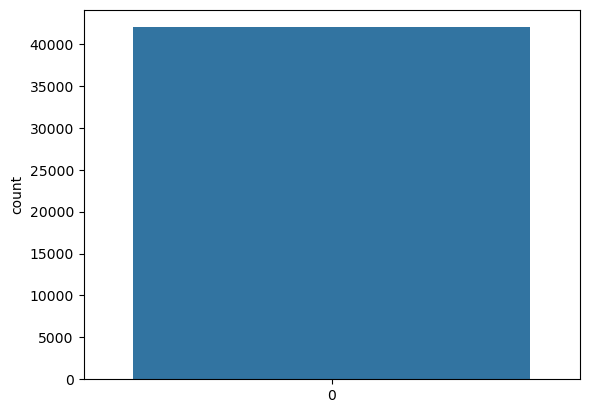

In [7]:
# sns.countplot(data = train, x = "label")
sns.countplot(y_train)

In [8]:
# 数据归一化
x_train = x_train / 255.0
x_text = x_test / 255.0

In [9]:
# 数据转换为28x28x1
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)

In [10]:
# 标签独热编码
y_train = to_categorical(y_train, num_classes = 10)
y_train.shape

(42000, 10)

In [11]:
# 划分训练和验证集
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

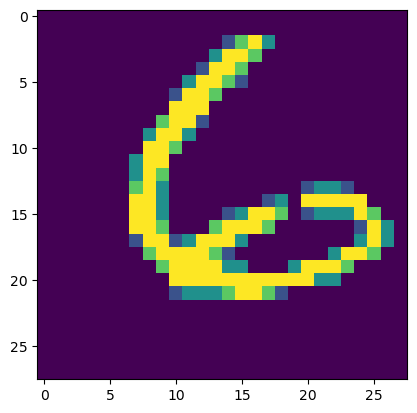

In [12]:
plt.imshow(x_train[32][:,:,:])

## 搭建卷积神经网络

In [13]:
from keras.models import Sequential #导入序贯模型
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D #导入CNN相关的层
from tensorflow.keras.optimizers.legacy import RMSprop #RMS优化器
# from tensorflow.keras.optimizers import RMSprop #RMS优化器

In [14]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "same", activation = "relu", input_shape=(28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (5,5)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(10, activation = "softmax"))


In [15]:
optimizer = RMSprop(learning_rate = 0.001, rho = 0.9, epsilon = 1e-08, decay = 0.0) #定义优化器


In [16]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = "accuracy") #编译模型

In [17]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/10
296/296 [==============================] - 125s 418ms/step - loss: 0.3895 - accuracy: 0.8733 - val_loss: 0.1326 - val_accuracy: 0.9557
Epoch 2/10
296/296 [==============================] - 123s 416ms/step - loss: 0.0888 - accuracy: 0.9728 - val_loss: 0.0555 - val_accuracy: 0.9833
Epoch 3/10
296/296 [==============================] - 123s 414ms/step - loss: 0.0619 - accuracy: 0.9812 - val_loss: 0.0384 - val_accuracy: 0.9893
Epoch 4/10
296/296 [==============================] - 123s 416ms/step - loss: 0.0488 - accuracy: 0.9851 - val_loss: 0.0633 - val_accuracy: 0.9817
Epoch 5/10
296/296 [==============================] - 122s 413ms/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.0365 - val_accuracy: 0.9898
Epoch 6/10
296/296 [==============================] - 123s 415ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0346 - val_accuracy: 0.9876
Epoch 7/10
296/296 [==============================] - 123s 416ms/step - loss: 0.0310 - accuracy: 0.9903 - val_loss: 0.0352 -

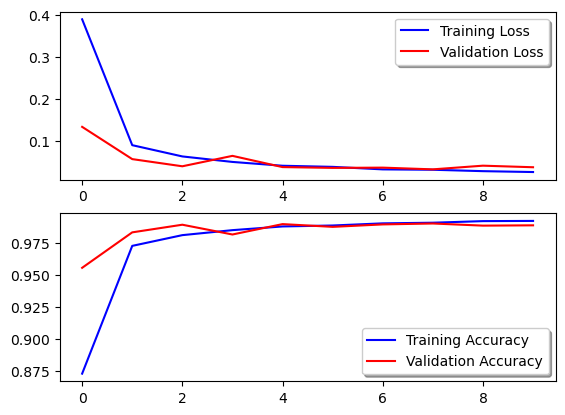

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history["loss"], color = "b", label = "Training Loss")
ax[0].plot(history.history["val_loss"], color = "r", label = "Validation Loss")
axes = ax[0]
legend = ax[0].legend(loc = "best", shadow = True)

ax[1].plot(history.history["accuracy"], color = "b", label = "Training Accuracy")
ax[1].plot(history.history["val_accuracy"], color = "r", label = "Validation Accuracy")
axes = ax[1]
legend = ax[1].legend(loc = "best", shadow = True)


In [19]:
# 生成结果
results = model.predict(x_test)
results = np.argmax(results, axis = 1)
results = pd.Series(results, name = "Label")

875/875 [==============================] - 19s 22ms/step


In [20]:
# 生成提交文件
from datetime import datetime
submission = pd.read_csv(source_file_path + submission_template) #读取提交模板
submission["Label"] = results
time_stamp = datetime.now().strftime("%m-%d-%H-%M-%S") #生成时间戳
csv_name = "digit_recg" + time_stamp + ".csv"
submission.to_csv(output_path + csv_name, index = False)